   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.0000

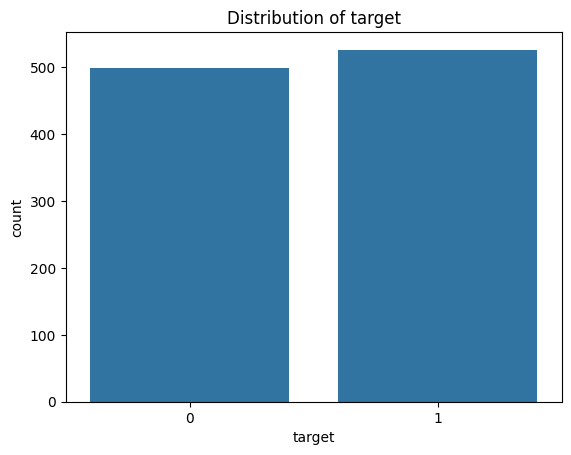


Missing values: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Duplicate records:  723

Updated dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes

C:\Users\Anas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [11]:
#Task 1

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('heart.csv')


# EDA
print(df.head())
print(df.describe())


# Check dataset balanced or not
print("\nDistribution of target:")
print(df['target'].value_counts())

sns.countplot(x='target', data=df)
plt.title('Distribution of target')
plt.show()

# Handling missing values
print("\nMissing values: ")
print(df.isnull().sum())

print("\nDuplicate records: ", df.duplicated().sum())
df = df.drop_duplicates()

print("\nUpdated dataset:")
df.info()


# Feature scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


scaler = MinMaxScaler()

X = df.drop(columns=['target'])
y = df['target']

X_train = scaler.fit_transform(X)


# Split dataset

X_train_full, X_test, y_train_full, y_test = train_test_split(X_train, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=0)

# We use validation set because it helps to tune the model's hyperparameters without testing on the final test set,
# which ensures that the model is evaluated on unseen data during the tuning process.

# Random Forest

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

print("\nRandom Forest")
print("\nNumber of Trees used: ", model.n_estimators)

prediction = model.predict(X_test)

accuracy_test = accuracy_score(y_test,prediction)
accuracy_train = accuracy_score(y_train_full,model.predict(X_train_full))

print("Accuracy score on test dataset: ",accuracy_test)
print("Accuracy score on train dataset: ",accuracy_train)


# XGBoost/Gradient Boost

from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=0)
model.fit(X_train,y_train)
print("\nXGBoost")
print("Model Score on train dataset: ", model.score(X_train_full,y_train_full))
print("Model Score on test dataset: ", model.score(X_test,y_test))


# ADABOOST

from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(random_state=0)
model.fit(X_train,y_train)
print("\nADABoost")
print("Model Score on train dataset: ", model.score(X_train_full,y_train_full))
print("Model Score on test dataset: ", model.score(X_test,y_test))


#Explaination 

# Random Forest: If the training accuracy is significantly higher than the testing accuracy, then Random Forest may be overfitting the data. 
# It generally tends to reduce variance but can suffer from overfitting

#XGBoost: XGBoost provides balanced results, as it is good at reducing bias and variance through gradient boosting

# ADABoost: AdaBoost is prone to underfitting, especially if the data is not complex enough as then it cant capture the underlying patterns in the data properly.




Hard Voting Accuracy:  0.7634854771784232

Soft Voting Accuracy:  0.8524590163934426
Soft Voting gives the Better Accuracy

Voting Accuracy with Different Weights:
Hard Voting Weights=[1, 1, 1, 1], Accuracy=0.5901639344262295
Soft Voting Weights=[1, 1, 1, 1], Accuracy=0.6229508196721312
Hard Voting Weights=[1, 1, 1, 2], Accuracy=0.5737704918032787
Soft Voting Weights=[1, 1, 1, 2], Accuracy=0.6229508196721312
Hard Voting Weights=[1, 1, 1, 3], Accuracy=0.6065573770491803
Soft Voting Weights=[1, 1, 1, 3], Accuracy=0.5901639344262295
Hard Voting Weights=[1, 1, 2, 1], Accuracy=0.5901639344262295
Soft Voting Weights=[1, 1, 2, 1], Accuracy=0.6229508196721312
Hard Voting Weights=[1, 1, 2, 2], Accuracy=0.5737704918032787
Soft Voting Weights=[1, 1, 2, 2], Accuracy=0.6229508196721312
Hard Voting Weights=[1, 1, 2, 3], Accuracy=0.5737704918032787
Soft Voting Weights=[1, 1, 2, 3], Accuracy=0.5901639344262295
Hard Voting Weights=[1, 1, 3, 1], Accuracy=0.5901639344262295
Soft Voting Weights=[1, 1, 3,

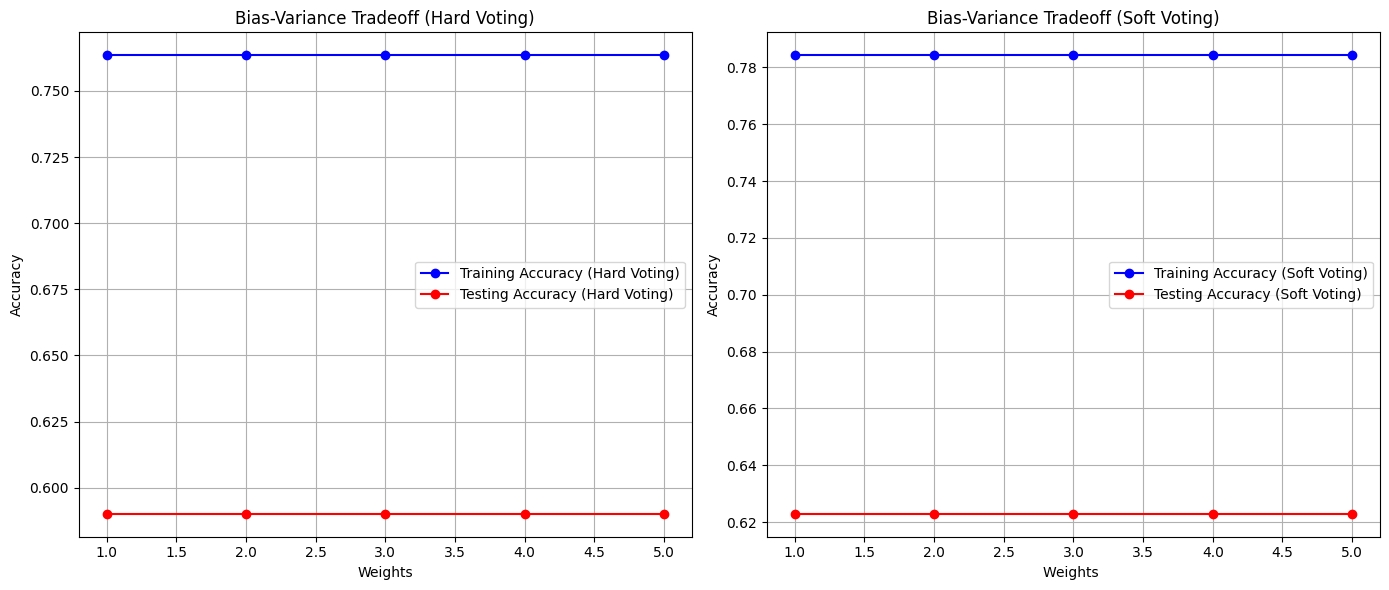

In [17]:
# Task 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = df[['restecg', 'oldpeak']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model1 = DecisionTreeClassifier(random_state=0)
model2 = KNeighborsClassifier()
model3 = RandomForestClassifier(random_state=0)
model4 = GradientBoostingClassifier(learning_rate=0.01, random_state=0)


# Hard Voting
model_hard = VotingClassifier(estimators=[('dt', model1),('knn', model2),('rf', model3),('xgb', model4)], voting='hard')

model_hard.fit(X_train, y_train)

hard_score = model_hard.score(X_train, y_train)
print("\nHard Voting Accuracy: ", hard_score)


# Soft Voting
model_soft = VotingClassifier(estimators=[('dt', model1),('knn', model2),('rf', model3),('xgb', model4)], voting='soft')

model_soft.fit(X_test, y_test)

soft_score = model_soft.score(X_test, y_test)
print("\nSoft Voting Accuracy: ", soft_score)

if hard_score > soft_score:
    print("Hard Voting Gives the Better Accuracy")
else:
    print("Soft Voting gives the Better Accuracy")



# Hard Voting and Soft Voting with Different Weights

estimators = [('dt', model1), ('knn', model2), ('rf', model3), ('xgb', model4)]

print("\nVoting Accuracy with Different Weights:")

best_accuracy_hard = 0
best_weights_hard = []
best_accuracy_soft = 0
best_weights_soft = []

weights_range = range(1, 4)

for i in weights_range:
    for j in weights_range:
        for k in weights_range:
            for l in weights_range:
                weights = [i, j, k, l]

                # Hard Voting Weighted Averaging
                vc_hard = VotingClassifier(estimators=estimators, voting='hard', weights=weights)
                vc_hard.fit(X_train, y_train)
                acc_hard = vc_hard.score(X_test, y_test)
                print(f"Hard Voting Weights={weights}, Accuracy={acc_hard}")

                if acc_hard > best_accuracy_hard:
                    best_accuracy_hard = acc_hard
                    best_weights_hard = weights

                # Soft Voting Weighted Averaging
                vc_soft = VotingClassifier(estimators=estimators, voting='soft', weights=weights)
                vc_soft.fit(X_train, y_train)
                acc_soft = vc_soft.score(X_test, y_test)
                print(f"Soft Voting Weights={weights}, Accuracy={acc_soft}")

                if acc_soft > best_accuracy_soft:
                    best_accuracy_soft = acc_soft
                    best_weights_soft = weights

print("\nBest Hard Voting Weights: ", best_weights_hard, " with Accuracy: ", best_accuracy_hard)
print("Best Soft Voting Weights: ", best_weights_soft, " with Accuracy: ", best_accuracy_soft)




# Plotting 

# Bias Variance Tradeoff Graph for Hard Voting
train_accuracies_hard = []
test_accuracies_hard = []

for i in range(1, 6):
    weights = [i, i, i, i]  

    vc_hard = VotingClassifier(estimators=estimators, voting='hard', weights=weights)
    vc_hard.fit(X_train, y_train)

    train_accuracies_hard.append(vc_hard.score(X_train, y_train))
    test_accuracies_hard.append(vc_hard.score(X_test, y_test))


# Plotting Graph for Hard Voting
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), train_accuracies_hard, label='Training Accuracy (Hard Voting)', marker='o', color='blue')
plt.plot(range(1, 6), test_accuracies_hard, label='Testing Accuracy (Hard Voting)', marker='o', color='red')
plt.xlabel('Weights')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff (Hard Voting)')
plt.legend()
plt.grid(True)


# Bias Variance Tradeoff Graph for Soft Voting
train_accuracies_soft = []
test_accuracies_soft = []

for i in range(1, 6):
    weights = [i, i, i, i]  

    vc_soft = VotingClassifier(estimators=estimators, voting='soft', weights=weights)
    vc_soft.fit(X_train, y_train)

    train_accuracies_soft.append(vc_soft.score(X_train, y_train))
    test_accuracies_soft.append(vc_soft.score(X_test, y_test))


# Plotting Graph for Soft Voting
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), train_accuracies_soft, label='Training Accuracy (Soft Voting)', marker='o', color='blue')
plt.plot(range(1, 6), test_accuracies_soft, label='Testing Accuracy (Soft Voting)', marker='o', color='red')
plt.xlabel('Weights ')
plt.ylabel('Accuracy')
plt.title('Bias-Variance Tradeoff (Soft Voting)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



C:\Users\Anas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Anas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Voting Classifier
Training Accuracy:  0.8838174273858921
Testing Accuracy:  0.6065573770491803

Random Forest

Number of Trees used:  100
Accuracy score on test dataset:  0.6065573770491803
Accuracy score on train dataset:  0.8838174273858921

AdaBoost
Model Score on train dataset:  0.7095435684647303
Model Score on test dataset:  0.4426229508196721


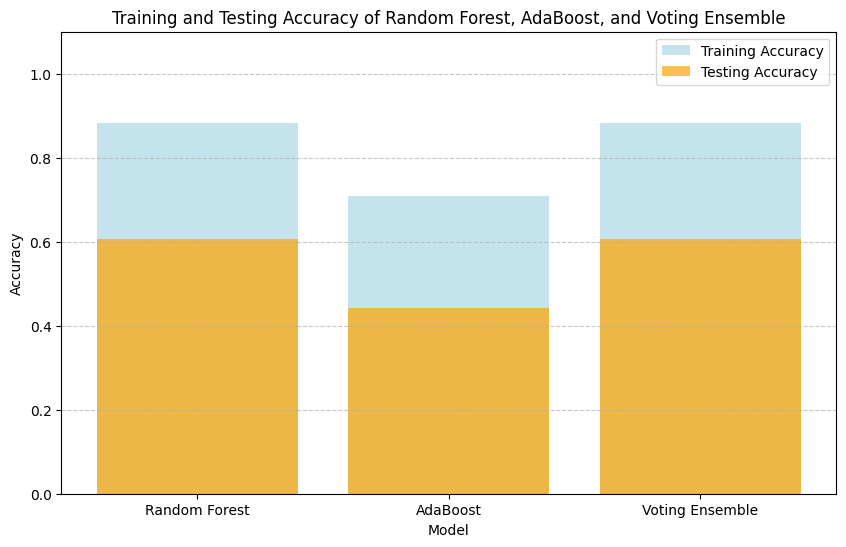

In [18]:
#Task 3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

X = df[['restecg', 'chol']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Voting CLassifier
voting_model = VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=0)),('ada', AdaBoostClassifier(random_state=0))], voting='soft')

voting_model.fit(X_train, y_train)

voting_accuracy_train = voting_model.score(X_train, y_train)
voting_accuracy_test = voting_model.score(X_test, y_test)

print("\nVoting Classifier")
print("Training Accuracy: ", voting_accuracy_train)
print("Testing Accuracy: ", voting_accuracy_test)



# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print("\nRandom Forest")
print("\nNumber of Trees used: ", rf_model.n_estimators)

rf_prediction = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_prediction)
rf_accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))

print("Accuracy score on test dataset: ", rf_accuracy_test)
print("Accuracy score on train dataset: ", rf_accuracy_train)


# AdaBoost
adaboost_model = AdaBoostClassifier(random_state=0)
adaboost_model.fit(X_train, y_train)

print("\nAdaBoost")
print("Model Score on train dataset: ", adaboost_model.score(X_train, y_train))
print("Model Score on test dataset: ", adaboost_model.score(X_test, y_test))



# Plotting 
plt.figure(figsize=(10, 6))
x_labels = ['Random Forest', 'AdaBoost', 'Voting Ensemble']
train_accuracies = [rf_accuracy_train, adaboost_model.score(X_train, y_train), voting_accuracy_train]
test_accuracies = [rf_accuracy_test, adaboost_model.score(X_test, y_test), voting_accuracy_test]

# Plot training accuracy
plt.bar(x_labels, train_accuracies, color='lightblue', alpha=0.7, label='Training Accuracy')

# Plot testing accuracy
plt.bar(x_labels, test_accuracies, color='orange', alpha=0.7, label='Testing Accuracy')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Random Forest, AdaBoost, and Voting Ensemble')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
